In [ ]:
###ANN

In [44]:
;limport tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers

print(tf.__version__)

2.10.0


In [45]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [46]:
# more details about the dataset in this link https://archive.ics.uci.edu/ml/datasets/auto+mpg
dataset_path = keras.utils.get_file("auto-mpg.data", "http://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data")
dataset_path

'C:\\Users\\User\\.keras\\datasets\\auto-mpg.data'

In [47]:
column_names = ['MPG','Cylinders','Displacement','Horsepower','Weight', 'Acceleration', 'Model Year', 'Origin']
dataset = pd.read_csv(dataset_path, names=column_names,
                      na_values = "?", comment='\t',
                      sep=" ", skipinitialspace=True)

dataset

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin
0,18.0,8,307.0,130.0,3504.0,12.0,70,1
1,15.0,8,350.0,165.0,3693.0,11.5,70,1
2,18.0,8,318.0,150.0,3436.0,11.0,70,1
3,16.0,8,304.0,150.0,3433.0,12.0,70,1
4,17.0,8,302.0,140.0,3449.0,10.5,70,1
...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.0,2790.0,15.6,82,1
394,44.0,4,97.0,52.0,2130.0,24.6,82,2
395,32.0,4,135.0,84.0,2295.0,11.6,82,1
396,28.0,4,120.0,79.0,2625.0,18.6,82,1


In [48]:
dataset.head()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin
0,18.0,8,307.0,130.0,3504.0,12.0,70,1
1,15.0,8,350.0,165.0,3693.0,11.5,70,1
2,18.0,8,318.0,150.0,3436.0,11.0,70,1
3,16.0,8,304.0,150.0,3433.0,12.0,70,1
4,17.0,8,302.0,140.0,3449.0,10.5,70,1


## Prepare the data

In [49]:
# Prepare the data
dataset.isna().sum()

MPG             0
Cylinders       0
Displacement    0
Horsepower      6
Weight          0
Acceleration    0
Model Year      0
Origin          0
dtype: int64

In [50]:
dataset = dataset.dropna()
dataset

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin
0,18.0,8,307.0,130.0,3504.0,12.0,70,1
1,15.0,8,350.0,165.0,3693.0,11.5,70,1
2,18.0,8,318.0,150.0,3436.0,11.0,70,1
3,16.0,8,304.0,150.0,3433.0,12.0,70,1
4,17.0,8,302.0,140.0,3449.0,10.5,70,1
...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.0,2790.0,15.6,82,1
394,44.0,4,97.0,52.0,2130.0,24.6,82,2
395,32.0,4,135.0,84.0,2295.0,11.6,82,1
396,28.0,4,120.0,79.0,2625.0,18.6,82,1


In [51]:
dataset = dataset.drop_duplicates()
dataset

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin
0,18.0,8,307.0,130.0,3504.0,12.0,70,1
1,15.0,8,350.0,165.0,3693.0,11.5,70,1
2,18.0,8,318.0,150.0,3436.0,11.0,70,1
3,16.0,8,304.0,150.0,3433.0,12.0,70,1
4,17.0,8,302.0,140.0,3449.0,10.5,70,1
...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.0,2790.0,15.6,82,1
394,44.0,4,97.0,52.0,2130.0,24.6,82,2
395,32.0,4,135.0,84.0,2295.0,11.6,82,1
396,28.0,4,120.0,79.0,2625.0,18.6,82,1


In [52]:
# The "Origin" column is really categorical, not numeric. So convert that to a one-hot
dataset['Origin'] = dataset['Origin'].map({1: 'USA', 2: 'Europe', 3: 'Japan'})

# one-hot encoding
dataset = pd.get_dummies(dataset, prefix='Origin_', prefix_sep='')
dataset.tail()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin_Europe,Origin_Japan,Origin_USA
393,27.0,4,140.0,86.0,2790.0,15.6,82,0,0,1
394,44.0,4,97.0,52.0,2130.0,24.6,82,1,0,0
395,32.0,4,135.0,84.0,2295.0,11.6,82,0,0,1
396,28.0,4,120.0,79.0,2625.0,18.6,82,0,0,1
397,31.0,4,119.0,82.0,2720.0,19.4,82,0,0,1


In [53]:
# Split the data into train (80%) and test (%20)
train_dataset = dataset.sample(frac=0.8, random_state=0)
test_dataset = dataset.drop(train_dataset.index) 

In [54]:
train_dataset.shape , test_dataset.shape

((314, 10), (78, 10))

In [57]:
norm_cols = ['Displacement', 'Horsepower', 'Weight', 'Acceleration']

train_stats = train_dataset[norm_cols].describe()
train_stats = train_stats.transpose()
train_stats

,count,mean,std,min,25%,50%,75%,max
Displacement,314.0,195.318471,104.331589,68.0,105.50,151.0,265.75,455.0
Horsepower,314.0,104.869427,38.096214,46.0,76.25,94.5,128.00,225.0
Weight,314.0,2990.251592,843.898596,1649.0,2256.50,2822.5,3608.00,5140.0


In [59]:
#  Split features from labels (miles per gallon= MPG)
train_labels = train_dataset.pop('MPG')
test_labels = test_dataset.pop('MPG')

# normalize the data
def norm(x):
  return (x - train_stats['mean']) / train_stats['std']
  

train_dataset[norm_cols] = norm(train_dataset[norm_cols])
test_dataset[norm_cols] = norm(test_dataset[norm_cols])

In [62]:
normed_train_data = train_dataset.copy()
normed_test_data = test_dataset.copy()

In [63]:
normed_train_data.describe().T

,count,mean,std,min,25%,50%,75%,max
Cylinders,314.0,5.477707e+00,1.699788,3.000000,4.000000,4.000000,8.000000,8.000000
Displacement,314.0,8.627211e-17,1.000000,-1.220325,-0.860894,-0.424785,0.675074,2.489002
Horsepower,314.0,-9.900078e-18,1.000000,-1.545283,-0.751241,-0.272190,0.607162,3.153347
Weight,314.0,-8.485781e-17,1.000000,-1.589352,-0.869478,-0.198782,0.732017,2.547401
Acceleration,314.0,1.555924e+01,2.789230,8.000000,13.800000,15.500000,17.200000,24.800000
Model Year,314.0,7.589809e+01,3.675642,70.000000,73.000000,76.000000,79.000000,82.000000
Origin_Europe,314.0,1.783439e-01,0.383413,0.000000,0.000000,0.000000,0.000000,1.000000
Origin_Japan,314.0,1.974522e-01,0.398712,0.000000,0.000000,0.000000,0.000000,1.000000
Origin_USA,314.0,6.242038e-01,0.485101,0.000000,0.000000,1.000000,1.000000,1.000000


## Build the ANN model

In [67]:
train_dataset.shape[1], len(train_dataset.keys())

9

In [68]:
def build_model():
  model = keras.Sequential([
    layers.Dense(50, activation='relu', input_shape=[train_dataset.shape[1]]),
    layers.Dense(50, activation='relu'),
    layers.Dense(50, activation='relu'),
    layers.Dense(50, activation='relu'),
    layers.Dense(1)])
  
  # if there is no activation fuction in dense layer. then it will return sum of (weight * features + bias)
  optimizer = tf.keras.optimizers.RMSprop(0.001)

  model.compile(loss='mse',
                optimizer=optimizer,
                metrics=['mae', 'mse'])
  return model

In [69]:
model = build_model()
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 50)                500       
                                                                 
 dense_1 (Dense)             (None, 50)                2550      
                                                                 
 dense_2 (Dense)             (None, 50)                2550      
                                                                 
 dense_3 (Dense)             (None, 50)                2550      
                                                                 
 dense_4 (Dense)             (None, 1)                 51        
                                                                 
Total params: 8,201
Trainable params: 8,201
Non-trainable params: 0
_________________________________________________________________


In [70]:
# Now try out the model. Take a batch of 10 examples from the training data and call model.predict on it.
example_batch = normed_train_data[:10]
example_result = model.predict(example_batch)
example_result

1/1 [==============================] - 0s 218ms/step


array([[1.6089107],
       [1.6521429],
       [1.8731716],
       [1.851272 ],
       [1.6742904],
       [1.8417041],
       [1.6552362],
       [1.4568468],
       [1.7147374],
       [1.405685 ]], dtype=float32)

In [71]:
EPOCHS = 500

history = model.fit(normed_train_data, train_labels, epochs=EPOCHS, validation_split = 0.1, verbose=1)

Epoch 1/500


c:\users\user\.pyenv\pyenv-win-master\pyenv-win\versions\3.8.6\lib\site-packages\keras\engine\data_adapter.py:1699: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return t[start:end]


9/9 [==============================] - 1s 19ms/step - loss: 175.0228 - mae: 10.2222 - mse: 175.0228 - val_loss: 66.6221 - val_mae: 6.8811 - val_mse: 66.6221
Epoch 2/500
9/9 [==============================] - 0s 4ms/step - loss: 51.1874 - mae: 5.9378 - mse: 51.1874 - val_loss: 61.5609 - val_mae: 6.6998 - val_mse: 61.5609
Epoch 3/500
9/9 [==============================] - 0s 5ms/step - loss: 49.4468 - mae: 5.8751 - mse: 49.4468 - val_loss: 58.6229 - val_mae: 6.5304 - val_mse: 58.6229
Epoch 4/500
9/9 [==============================] - 0s 5ms/step - loss: 46.2453 - mae: 5.6976 - mse: 46.2453 - val_loss: 55.8520 - val_mae: 6.3711 - val_mse: 55.8520
Epoch 5/500
9/9 [==============================] - 0s 5ms/step - loss: 45.1611 - mae: 5.5430 - mse: 45.1611 - val_loss: 52.9373 - val_mae: 6.2202 - val_mse: 52.9373
Epoch 6/500
9/9 [==============================] - 0s 5ms/step - loss: 42.5145 - mae: 5.4347 - mse: 42.5145 - val_loss: 52.2728 - val_mae: 6.0661 - val_mse: 52.2728
Epoch 7/500
9/9 [=

9/9 [==============================] - 0s 5ms/step - loss: 14.8283 - mae: 2.8573 - mse: 14.8283 - val_loss: 13.2970 - val_mae: 2.6723 - val_mse: 13.2970
Epoch 51/500
9/9 [==============================] - 0s 5ms/step - loss: 15.5854 - mae: 2.9084 - mse: 15.5854 - val_loss: 12.3339 - val_mae: 2.5950 - val_mse: 12.3339
Epoch 52/500
9/9 [==============================] - 0s 4ms/step - loss: 11.6026 - mae: 2.4625 - mse: 11.6026 - val_loss: 16.0534 - val_mae: 2.8565 - val_mse: 16.0534
Epoch 53/500
9/9 [==============================] - 0s 5ms/step - loss: 16.4695 - mae: 2.9264 - mse: 16.4695 - val_loss: 13.4851 - val_mae: 2.6883 - val_mse: 13.4851
Epoch 54/500
9/9 [==============================] - 0s 5ms/step - loss: 12.4914 - mae: 2.5381 - mse: 12.4914 - val_loss: 12.8353 - val_mae: 2.6093 - val_mse: 12.8353
Epoch 55/500
9/9 [==============================] - 0s 5ms/step - loss: 14.0269 - mae: 2.7831 - mse: 14.0269 - val_loss: 12.1384 - val_mae: 2.5569 - val_mse: 12.1384
Epoch 56/500
9/9 

9/9 [==============================] - 0s 5ms/step - loss: 14.2255 - mae: 2.7489 - mse: 14.2255 - val_loss: 13.5241 - val_mae: 2.5915 - val_mse: 13.5241
Epoch 100/500
9/9 [==============================] - 0s 5ms/step - loss: 11.7670 - mae: 2.3854 - mse: 11.7670 - val_loss: 13.7036 - val_mae: 2.8604 - val_mse: 13.7036
Epoch 101/500
9/9 [==============================] - 0s 5ms/step - loss: 12.2550 - mae: 2.5452 - mse: 12.2550 - val_loss: 12.0713 - val_mae: 2.6430 - val_mse: 12.0713
Epoch 102/500
9/9 [==============================] - 0s 5ms/step - loss: 13.6901 - mae: 2.6181 - mse: 13.6901 - val_loss: 12.3409 - val_mae: 2.5353 - val_mse: 12.3409
Epoch 103/500
9/9 [==============================] - 0s 5ms/step - loss: 10.9121 - mae: 2.3382 - mse: 10.9121 - val_loss: 17.8226 - val_mae: 2.8694 - val_mse: 17.8226
Epoch 104/500
9/9 [==============================] - 0s 5ms/step - loss: 13.8480 - mae: 2.6635 - mse: 13.8480 - val_loss: 13.8345 - val_mae: 2.6113 - val_mse: 13.8345
Epoch 105/50

9/9 [==============================] - 0s 5ms/step - loss: 13.2402 - mae: 2.5622 - mse: 13.2402 - val_loss: 16.1106 - val_mae: 2.7935 - val_mse: 16.1106
Epoch 149/500
9/9 [==============================] - 0s 4ms/step - loss: 10.4773 - mae: 2.2654 - mse: 10.4773 - val_loss: 12.3654 - val_mae: 2.6527 - val_mse: 12.3654
Epoch 150/500
9/9 [==============================] - 0s 5ms/step - loss: 12.2489 - mae: 2.5521 - mse: 12.2489 - val_loss: 13.6252 - val_mae: 2.6218 - val_mse: 13.6252
Epoch 151/500
9/9 [==============================] - 0s 4ms/step - loss: 11.2751 - mae: 2.3896 - mse: 11.2751 - val_loss: 12.0693 - val_mae: 2.5077 - val_mse: 12.0693
Epoch 152/500
9/9 [==============================] - 0s 5ms/step - loss: 11.0657 - mae: 2.3735 - mse: 11.0657 - val_loss: 12.6163 - val_mae: 2.6860 - val_mse: 12.6163
Epoch 153/500
9/9 [==============================] - 0s 5ms/step - loss: 11.8580 - mae: 2.5055 - mse: 11.8580 - val_loss: 19.2084 - val_mae: 3.1043 - val_mse: 19.2084
Epoch 154/50

9/9 [==============================] - 0s 4ms/step - loss: 11.5493 - mae: 2.4122 - mse: 11.5493 - val_loss: 12.0908 - val_mae: 2.5603 - val_mse: 12.0908
Epoch 198/500
9/9 [==============================] - 0s 4ms/step - loss: 11.7362 - mae: 2.3874 - mse: 11.7362 - val_loss: 12.6441 - val_mae: 2.5637 - val_mse: 12.6441
Epoch 199/500
9/9 [==============================] - 0s 4ms/step - loss: 10.7148 - mae: 2.3562 - mse: 10.7148 - val_loss: 12.3571 - val_mae: 2.6067 - val_mse: 12.3571
Epoch 200/500
9/9 [==============================] - 0s 4ms/step - loss: 12.2192 - mae: 2.4881 - mse: 12.2192 - val_loss: 16.1799 - val_mae: 2.8547 - val_mse: 16.1799
Epoch 201/500
9/9 [==============================] - 0s 5ms/step - loss: 10.8097 - mae: 2.3018 - mse: 10.8097 - val_loss: 11.7529 - val_mae: 2.5159 - val_mse: 11.7529
Epoch 202/500
9/9 [==============================] - 0s 4ms/step - loss: 9.6453 - mae: 2.1842 - mse: 9.6453 - val_loss: 11.5794 - val_mae: 2.4703 - val_mse: 11.5794
Epoch 203/500


9/9 [==============================] - 0s 5ms/step - loss: 10.4746 - mae: 2.2659 - mse: 10.4746 - val_loss: 12.4692 - val_mae: 2.7040 - val_mse: 12.4692
Epoch 247/500
9/9 [==============================] - 0s 6ms/step - loss: 10.9844 - mae: 2.3498 - mse: 10.9844 - val_loss: 12.7341 - val_mae: 2.6131 - val_mse: 12.7341
Epoch 248/500
9/9 [==============================] - 0s 5ms/step - loss: 11.5382 - mae: 2.4119 - mse: 11.5382 - val_loss: 12.5051 - val_mae: 2.5759 - val_mse: 12.5051
Epoch 249/500
9/9 [==============================] - 0s 6ms/step - loss: 9.5408 - mae: 2.1374 - mse: 9.5408 - val_loss: 14.5507 - val_mae: 2.7880 - val_mse: 14.5507
Epoch 250/500
9/9 [==============================] - 0s 6ms/step - loss: 11.4577 - mae: 2.3500 - mse: 11.4577 - val_loss: 13.9234 - val_mae: 2.7259 - val_mse: 13.9234
Epoch 251/500
9/9 [==============================] - 0s 5ms/step - loss: 9.6370 - mae: 2.2204 - mse: 9.6370 - val_loss: 20.9900 - val_mae: 3.3070 - val_mse: 20.9900
Epoch 252/500
9/

9/9 [==============================] - 0s 5ms/step - loss: 9.9118 - mae: 2.1655 - mse: 9.9118 - val_loss: 11.9730 - val_mae: 2.5526 - val_mse: 11.9730
Epoch 296/500
9/9 [==============================] - 0s 6ms/step - loss: 11.1241 - mae: 2.3423 - mse: 11.1241 - val_loss: 13.8210 - val_mae: 2.7128 - val_mse: 13.8210
Epoch 297/500
9/9 [==============================] - 0s 5ms/step - loss: 9.5078 - mae: 2.1154 - mse: 9.5078 - val_loss: 12.3478 - val_mae: 2.6325 - val_mse: 12.3478
Epoch 298/500
9/9 [==============================] - 0s 5ms/step - loss: 9.7126 - mae: 2.1558 - mse: 9.7126 - val_loss: 13.2468 - val_mae: 2.6086 - val_mse: 13.2468
Epoch 299/500
9/9 [==============================] - 0s 5ms/step - loss: 11.4097 - mae: 2.4110 - mse: 11.4097 - val_loss: 11.9928 - val_mae: 2.5667 - val_mse: 11.9928
Epoch 300/500
9/9 [==============================] - 0s 5ms/step - loss: 9.6206 - mae: 2.1481 - mse: 9.6206 - val_loss: 14.9986 - val_mae: 2.8358 - val_mse: 14.9986
Epoch 301/500
9/9 [=

9/9 [==============================] - 0s 5ms/step - loss: 9.9801 - mae: 2.2117 - mse: 9.9801 - val_loss: 13.7766 - val_mae: 2.7349 - val_mse: 13.7766
Epoch 345/500
9/9 [==============================] - 0s 6ms/step - loss: 10.5176 - mae: 2.2213 - mse: 10.5176 - val_loss: 13.1144 - val_mae: 2.6875 - val_mse: 13.1144
Epoch 346/500
9/9 [==============================] - 0s 5ms/step - loss: 9.4142 - mae: 2.1450 - mse: 9.4142 - val_loss: 13.8262 - val_mae: 2.7891 - val_mse: 13.8262
Epoch 347/500
9/9 [==============================] - 0s 4ms/step - loss: 9.3411 - mae: 2.1657 - mse: 9.3411 - val_loss: 13.9536 - val_mae: 2.9369 - val_mse: 13.9536
Epoch 348/500
9/9 [==============================] - 0s 6ms/step - loss: 10.4467 - mae: 2.2152 - mse: 10.4467 - val_loss: 17.3587 - val_mae: 3.0606 - val_mse: 17.3587
Epoch 349/500
9/9 [==============================] - 0s 6ms/step - loss: 10.8132 - mae: 2.3598 - mse: 10.8132 - val_loss: 11.9453 - val_mae: 2.5627 - val_mse: 11.9453
Epoch 350/500
9/9 

9/9 [==============================] - 0s 5ms/step - loss: 8.8183 - mae: 2.0578 - mse: 8.8183 - val_loss: 14.7608 - val_mae: 2.8143 - val_mse: 14.7608
Epoch 394/500
9/9 [==============================] - 0s 4ms/step - loss: 9.2476 - mae: 2.0735 - mse: 9.2476 - val_loss: 14.0865 - val_mae: 2.9603 - val_mse: 14.0865
Epoch 395/500
9/9 [==============================] - 0s 5ms/step - loss: 10.8693 - mae: 2.3717 - mse: 10.8693 - val_loss: 14.1593 - val_mae: 2.7992 - val_mse: 14.1593
Epoch 396/500
9/9 [==============================] - 0s 4ms/step - loss: 9.6547 - mae: 2.2653 - mse: 9.6547 - val_loss: 13.6562 - val_mae: 2.7365 - val_mse: 13.6562
Epoch 397/500
9/9 [==============================] - 0s 5ms/step - loss: 9.1956 - mae: 2.1548 - mse: 9.1956 - val_loss: 11.9651 - val_mae: 2.5474 - val_mse: 11.9651
Epoch 398/500
9/9 [==============================] - 0s 4ms/step - loss: 9.3438 - mae: 2.2020 - mse: 9.3438 - val_loss: 13.9187 - val_mae: 2.7305 - val_mse: 13.9187
Epoch 399/500
9/9 [===

9/9 [==============================] - 0s 5ms/step - loss: 9.8734 - mae: 2.1666 - mse: 9.8734 - val_loss: 13.5492 - val_mae: 2.7056 - val_mse: 13.5492
Epoch 443/500
9/9 [==============================] - 0s 5ms/step - loss: 9.7924 - mae: 2.2176 - mse: 9.7924 - val_loss: 17.3730 - val_mae: 3.1567 - val_mse: 17.3730
Epoch 444/500
9/9 [==============================] - 0s 5ms/step - loss: 8.9240 - mae: 2.0925 - mse: 8.9240 - val_loss: 15.1412 - val_mae: 2.9153 - val_mse: 15.1412
Epoch 445/500
9/9 [==============================] - 0s 5ms/step - loss: 9.6790 - mae: 2.2460 - mse: 9.6790 - val_loss: 14.6946 - val_mae: 2.8370 - val_mse: 14.6946
Epoch 446/500
9/9 [==============================] - 0s 5ms/step - loss: 8.6883 - mae: 2.0213 - mse: 8.6883 - val_loss: 16.2538 - val_mae: 3.1446 - val_mse: 16.2538
Epoch 447/500
9/9 [==============================] - 0s 6ms/step - loss: 10.4880 - mae: 2.3717 - mse: 10.4880 - val_loss: 16.3408 - val_mae: 3.0255 - val_mse: 16.3408
Epoch 448/500
9/9 [===

Epoch 492/500
9/9 [==============================] - 0s 5ms/step - loss: 9.2925 - mae: 2.1351 - mse: 9.2925 - val_loss: 13.8201 - val_mae: 2.8934 - val_mse: 13.8201
Epoch 493/500
9/9 [==============================] - 0s 4ms/step - loss: 8.7515 - mae: 2.0930 - mse: 8.7515 - val_loss: 11.8085 - val_mae: 2.5972 - val_mse: 11.8085
Epoch 494/500
9/9 [==============================] - 0s 5ms/step - loss: 9.0131 - mae: 2.1225 - mse: 9.0131 - val_loss: 12.3308 - val_mae: 2.6863 - val_mse: 12.3308
Epoch 495/500
9/9 [==============================] - 0s 4ms/step - loss: 9.2032 - mae: 2.2119 - mse: 9.2032 - val_loss: 12.1235 - val_mae: 2.5556 - val_mse: 12.1235
Epoch 496/500
9/9 [==============================] - 0s 5ms/step - loss: 8.6106 - mae: 2.0574 - mse: 8.6106 - val_loss: 21.1037 - val_mae: 3.5296 - val_mse: 21.1037
Epoch 497/500
9/9 [==============================] - 0s 4ms/step - loss: 9.7316 - mae: 2.2394 - mse: 9.7316 - val_loss: 13.3574 - val_mae: 2.7635 - val_mse: 13.3574
Epoch 498/

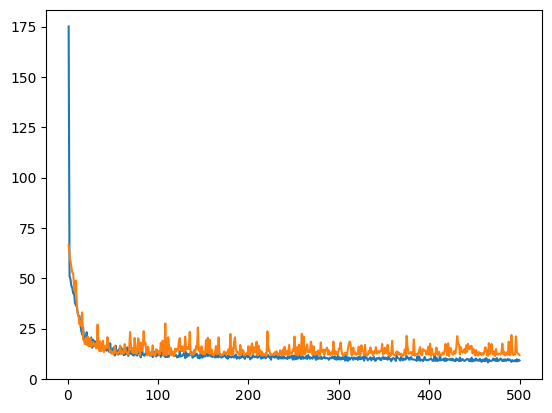

In [74]:
sns.lineplot(x= range(1, EPOCHS+1), y=history.history['mse'])
sns.lineplot(x=range(1, EPOCHS+1), y=history.history['val_mse'])
plt.show()

In [76]:
model = build_model()
EPOCHS = 1000

# The patience parameter is the amount of epochs to check for improvement
early_stop = keras.callbacks.EarlyStopping(monitor='val_mae', patience=50)

early_history = model.fit(normed_train_data, train_labels, 
                    epochs=EPOCHS, validation_split = 0.1, verbose=1, 
                    callbacks=[early_stop])

Epoch 1/1000


c:\users\user\.pyenv\pyenv-win-master\pyenv-win\versions\3.8.6\lib\site-packages\keras\engine\data_adapter.py:1699: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return t[start:end]


9/9 [==============================] - 1s 18ms/step - loss: 286.9781 - mae: 13.5646 - mse: 286.9781 - val_loss: 55.3584 - val_mae: 6.3535 - val_mse: 55.3584
Epoch 2/1000
9/9 [==============================] - 0s 4ms/step - loss: 43.9749 - mae: 5.5286 - mse: 43.9749 - val_loss: 51.8937 - val_mae: 6.1635 - val_mse: 51.8937
Epoch 3/1000
9/9 [==============================] - 0s 5ms/step - loss: 42.6009 - mae: 5.4445 - mse: 42.6009 - val_loss: 49.3121 - val_mae: 5.9847 - val_mse: 49.3121
Epoch 4/1000
9/9 [==============================] - 0s 5ms/step - loss: 42.6502 - mae: 5.4317 - mse: 42.6502 - val_loss: 48.1277 - val_mae: 5.8426 - val_mse: 48.1277
Epoch 5/1000
9/9 [==============================] - 0s 4ms/step - loss: 39.7874 - mae: 5.1779 - mse: 39.7874 - val_loss: 58.0584 - val_mae: 6.5694 - val_mse: 58.0584
Epoch 6/1000
9/9 [==============================] - 0s 5ms/step - loss: 39.2825 - mae: 5.2223 - mse: 39.2825 - val_loss: 41.0536 - val_mae: 5.3922 - val_mse: 41.0536
Epoch 7/1000


9/9 [==============================] - 0s 5ms/step - loss: 15.5555 - mae: 2.8895 - mse: 15.5555 - val_loss: 14.0315 - val_mae: 3.0622 - val_mse: 14.0315
Epoch 51/1000
9/9 [==============================] - 0s 5ms/step - loss: 13.9679 - mae: 2.7696 - mse: 13.9679 - val_loss: 14.9337 - val_mae: 3.2194 - val_mse: 14.9337
Epoch 52/1000
9/9 [==============================] - 0s 4ms/step - loss: 16.2295 - mae: 3.0118 - mse: 16.2295 - val_loss: 17.0575 - val_mae: 3.4341 - val_mse: 17.0575
Epoch 53/1000
9/9 [==============================] - 0s 5ms/step - loss: 14.2863 - mae: 2.8309 - mse: 14.2863 - val_loss: 19.2662 - val_mae: 3.0987 - val_mse: 19.2662
Epoch 54/1000
9/9 [==============================] - 0s 4ms/step - loss: 15.8169 - mae: 2.9085 - mse: 15.8169 - val_loss: 15.4067 - val_mae: 2.7427 - val_mse: 15.4067
Epoch 55/1000
9/9 [==============================] - 0s 5ms/step - loss: 13.4517 - mae: 2.5936 - mse: 13.4517 - val_loss: 23.0544 - val_mae: 4.0207 - val_mse: 23.0544
Epoch 56/100

9/9 [==============================] - 0s 5ms/step - loss: 15.0012 - mae: 2.7734 - mse: 15.0012 - val_loss: 12.7382 - val_mae: 2.5439 - val_mse: 12.7382
Epoch 100/1000
9/9 [==============================] - 0s 5ms/step - loss: 12.1813 - mae: 2.5228 - mse: 12.1813 - val_loss: 13.0130 - val_mae: 2.5243 - val_mse: 13.0130
Epoch 101/1000
9/9 [==============================] - 0s 4ms/step - loss: 12.5495 - mae: 2.4855 - mse: 12.5495 - val_loss: 11.9450 - val_mae: 2.4874 - val_mse: 11.9450
Epoch 102/1000
9/9 [==============================] - 0s 4ms/step - loss: 13.8250 - mae: 2.6055 - mse: 13.8250 - val_loss: 17.0483 - val_mae: 2.8106 - val_mse: 17.0483
Epoch 103/1000
9/9 [==============================] - 0s 5ms/step - loss: 13.3630 - mae: 2.6085 - mse: 13.3630 - val_loss: 12.8761 - val_mae: 2.5538 - val_mse: 12.8761
Epoch 104/1000
9/9 [==============================] - 0s 5ms/step - loss: 14.1927 - mae: 2.7089 - mse: 14.1927 - val_loss: 12.1157 - val_mae: 2.4773 - val_mse: 12.1157
Epoch 1

Epoch 148/1000
9/9 [==============================] - 0s 4ms/step - loss: 11.4652 - mae: 2.3789 - mse: 11.4652 - val_loss: 11.6813 - val_mae: 2.5301 - val_mse: 11.6813
Epoch 149/1000
9/9 [==============================] - 0s 4ms/step - loss: 14.0273 - mae: 2.6798 - mse: 14.0273 - val_loss: 12.1398 - val_mae: 2.5074 - val_mse: 12.1398
Epoch 150/1000
9/9 [==============================] - 0s 5ms/step - loss: 12.2388 - mae: 2.5557 - mse: 12.2388 - val_loss: 14.6726 - val_mae: 2.6669 - val_mse: 14.6726
Epoch 151/1000
9/9 [==============================] - 0s 4ms/step - loss: 10.6884 - mae: 2.2312 - mse: 10.6884 - val_loss: 19.2977 - val_mae: 3.0396 - val_mse: 19.2977
Epoch 152/1000
9/9 [==============================] - 0s 5ms/step - loss: 13.5176 - mae: 2.6091 - mse: 13.5176 - val_loss: 14.3730 - val_mae: 2.6358 - val_mse: 14.3730
Epoch 153/1000
9/9 [==============================] - 0s 4ms/step - loss: 11.7085 - mae: 2.4246 - mse: 11.7085 - val_loss: 14.7147 - val_mae: 2.6400 - val_mse: 

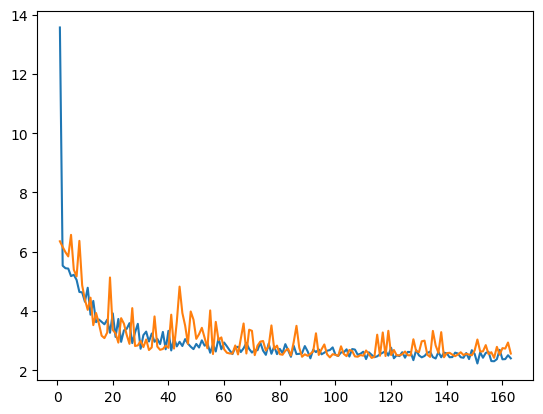

In [78]:
# plotter.plot({'Early Stopping': early_history}, metric = "mae")
# plt.ylim([0, 10])
# plt.ylabel('MAE [MPG]')

sns.lineplot(x= range(1, 164), y=early_history.history['mae'])
sns.lineplot(x= range(1, 164), y=early_history.history['val_mae'])
plt.show()

In [79]:
loss, mae, mse = model.evaluate(normed_test_data, test_labels, verbose=2)

print("Testing set Mean Abs Error: {:5.2f} MPG".format(mae))
print("Testing set Mean Squared Error: {:5.2f} MPG**2".format(mse))

3/3 - 0s - loss: 11.3073 - mae: 2.6148 - mse: 11.3073 - 97ms/epoch - 32ms/step
Testing set Mean Abs Error:  2.61 MPG
Testing set Mean Squared Error: 11.31 MPG**2


In [80]:
# Make predictions
model.predict(normed_test_data[:10]).round(1)

1/1 [==============================] - 0s 48ms/step


array([[14.3],
       [12.4],
       [12.3],
       [28.9],
       [21.5],
       [13.9],
       [14.5],
       [13.7],
       [20.1],
       [32.7]], dtype=float32)

In [81]:
test_labels[:10]

C:\Users\User\AppData\Local\Temp\ipykernel_19240\3641408047.py:1: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  test_labels[:10]


9     15.0
25    10.0
28     9.0
31    25.0
33    19.0
39    14.0
40    14.0
43    13.0
48    18.0
54    35.0
Name: MPG, dtype: float64

In [1]:
###CNN

In [1]:
import tensorflow as tf

from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

In [2]:
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

# Normalize pixel values to be between 0 and 1
train_images, test_images = train_images / 255.0, test_images / 255.0

170498071/170498071 [==============================] - 221s 1us/step


In [3]:
train_images.shape, test_images.shape

((50000, 32, 32, 3), (10000, 32, 32, 3))

In [4]:
import numpy as np

np.unique(train_labels)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [5]:
train_labels.shape

(50000, 1)

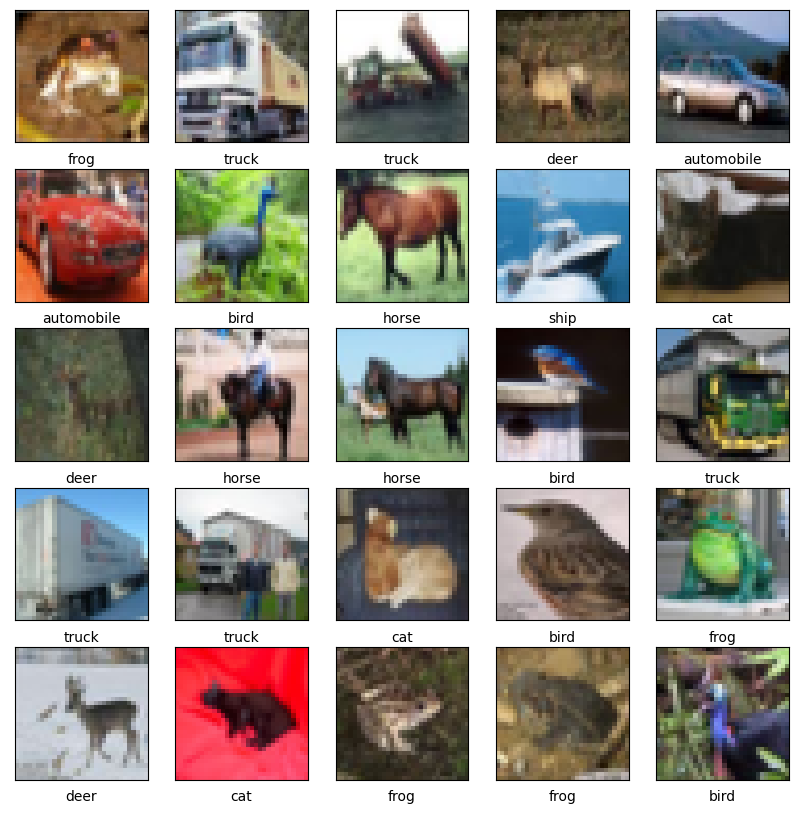

In [6]:
# To verify that the dataset looks correct, let's plot the first 25 images from the training set and display the class name below each image
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i])
    # The CIFAR labels happen to be arrays, 
    # which is why you need the extra index
    plt.xlabel(class_names[train_labels[i][0]])
plt.show()

## Build CNN model

In [7]:
# input shape
train_images.shape

(50000, 32, 32, 3)

In [8]:
model = models.Sequential()
# convolutional layers for features 
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

# fully connected layers
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10))

In [9]:
model.summary() 

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 15, 15, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 64)          36928     
                                                                 
 flatten (Flatten)           (None, 1024)              0

Here I use SparseCategoricalCrossentropy loss function when there are two or more label classes. We expect labels to be provided as integers. If you want to provide labels using one-hot representation, please use CategoricalCrossentropy loss.





In [10]:
# train model
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = model.fit(train_images, train_labels, epochs=10, 
                    validation_split = 0.2)

Epoch 1/10
1250/1250 [==============================] - 21s 16ms/step - loss: 1.6423 - accuracy: 0.3889 - val_loss: 1.4083 - val_accuracy: 0.4830
Epoch 2/10
1250/1250 [==============================] - 25s 20ms/step - loss: 1.2774 - accuracy: 0.5401 - val_loss: 1.1950 - val_accuracy: 0.5764
Epoch 3/10
1250/1250 [==============================] - 24s 19ms/step - loss: 1.1291 - accuracy: 0.5990 - val_loss: 1.0966 - val_accuracy: 0.6129
Epoch 4/10
1250/1250 [==============================] - 24s 19ms/step - loss: 1.0400 - accuracy: 0.6333 - val_loss: 1.1442 - val_accuracy: 0.6020
Epoch 5/10
1250/1250 [==============================] - 24s 20ms/step - loss: 0.9661 - accuracy: 0.6621 - val_loss: 0.9940 - val_accuracy: 0.6565
Epoch 6/10
1250/1250 [==============================] - 24s 19ms/step - loss: 0.9029 - accuracy: 0.6822 - val_loss: 0.9688 - val_accuracy: 0.6590
Epoch 7/10
1250/1250 [==============================] - 24s 19ms/step - loss: 0.8502 - accuracy: 0.7005 - val_loss: 1.0059 -

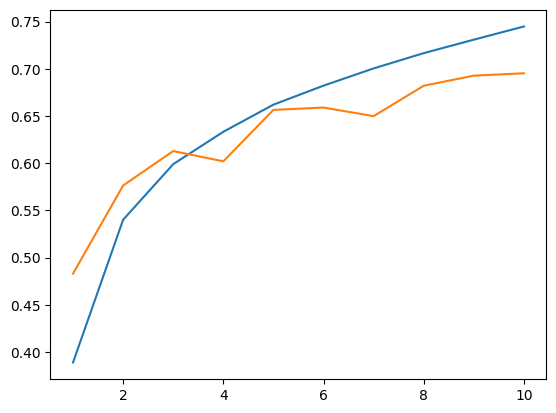

In [11]:
# !pip install -q git+https://github.com/tensorflow/docs

# import tensorflow_docs as tfdocs
# import tensorflow_docs as tfdocs
# import tensorflow_docs.plots
# import tensorflow_docs.modeling
# plotter = tfdocs.plots.HistoryPlotter(smoothing_std=2)

# plotter.plot({'CNN ': history}, metric = "accuracy")
# # plt.ylim([0, 10])
# plt.ylabel('accuracy')
import matplotlib.pyplot as plt
import seaborn as sns

sns.lineplot(x=range(1, 11), y=history.history['accuracy'])
sns.lineplot(x=range(1, 11), y=history.history['val_accuracy'])
plt.show()

In [13]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=1)
print(f'Accuracy with test data {test_acc* 100}')

313/313 [==============================] - 2s 6ms/step - loss: 0.9059 - accuracy: 0.6927
Accuracy with test data 69.27000284194946


In [1]:
pip install nbmerge


  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for nbmerge: filename=nbmerge-0.0.4-py2.py3-none-any.whl size=6429 sha256=1a83433225813f69ad01de676275165cc30ce5e76ad4b4f3a6ee1235d04bde97
  Stored in directory: c:\users\shahn\appdata\local\pip\cache\wheels\05\7d\2c\44d9b357515a0b4f972f5438115face603f69e8c70233ddc1a
Successfully built nbmerge


## Import section

In [1]:
# from pandas import read_csv
import pandas as pd

import numpy as np
from keras.models import Sequential

from keras.layers import Dense, SimpleRNN
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
import math
import matplotlib.pyplot as plt

## Download & prepare dataset

In [2]:
sunspots_url = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/monthly-sunspots.csv'
df = pd.read_csv(sunspots_url)
df.head()

,Month,Sunspots
0,1749-01,58.0
1,1749-02,62.6
2,1749-03,70.0
3,1749-04,55.7
4,1749-05,85.0
5,1749-06,83.5
6,1749-07,94.8
7,1749-08,66.3
8,1749-09,75.9
9,1749-10,75.5


In [3]:
df.tail()

,Month,Sunspots
2815,1983-08,71.8
2816,1983-09,50.3
2817,1983-10,55.8
2818,1983-11,33.3
2819,1983-12,33.4


In [4]:
df = pd.read_csv(sunspots_url,  usecols=[1])
data = np.array(df.values.astype('float32'))

# Normalize the dataset
scaler = MinMaxScaler(feature_range=(0, 1))
data = scaler.fit_transform(data).flatten()

n = len(data)
print(f'total {n} values')
# Point for splitting data into train and test
split = int(n* 0.8)

train_data = data[range(split)]
test_data = data[split:]

total 2820 values


In [5]:
train_data.shape

(2256,)

In [6]:
train_data[:13]

array([0.22852638, 0.24665089, 0.2758077 , 0.21946414, 0.33490935,
       0.3289992 , 0.37352246, 0.2612293 , 0.29905435, 0.29747832,
       0.6249015 , 0.33569738, 0.28881007], dtype=float32)

In [7]:
# Prepare the input X and target Y
def get_XY(dat, time_steps):
    # Indices of target array
    Y_ind = np.arange(time_steps, len(dat), time_steps)
    # Y = target data
    Y = dat[Y_ind]
    # Prepare X = features
    rows_x = len(Y)
    print('number of rows:', rows_x)
    X = dat[range(time_steps*rows_x)]
    X = np.reshape(X, (rows_x, time_steps, 1))    
    return X, Y

# perpare the features and labels
time_steps = 12
trainX, trainY = get_XY(train_data, time_steps)
testX, testY = get_XY(test_data, time_steps)

number of rows: 187
number of rows: 46


In [10]:
trainY[0]

0.28881007

In [11]:
trainX.shape, testX.shape, trainY.shape

((187, 12, 1), (46, 12, 1), (187,))

## Build RNN Model

In [12]:
# Keras SimpleRNN
hidden_units = 10
output_size = 1

input_shape=(time_steps, 1)

model = Sequential()
model.add(SimpleRNN(hidden_units, input_shape=input_shape, 
                    activation='tanh'))
model.add(Dense(units=output_size, activation='sigmoid'))


model.compile(loss='mean_squared_error', optimizer='adam')
model.summary() 

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn (SimpleRNN)      (None, 10)                120       
                                                                 
 dense (Dense)               (None, 1)                 11        
                                                                 
Total params: 131
Trainable params: 131
Non-trainable params: 0
_________________________________________________________________


In [13]:
hist = model.fit(trainX, trainY, epochs=100, validation_split=0.1, verbose=1)

Epoch 1/100
6/6 [==============================] - 1s 54ms/step - loss: 0.0879 - val_loss: 0.0768
Epoch 2/100
6/6 [==============================] - 0s 9ms/step - loss: 0.0712 - val_loss: 0.0595
Epoch 3/100
6/6 [==============================] - 0s 9ms/step - loss: 0.0556 - val_loss: 0.0441
Epoch 4/100
6/6 [==============================] - 0s 9ms/step - loss: 0.0418 - val_loss: 0.0317
Epoch 5/100
6/6 [==============================] - 0s 10ms/step - loss: 0.0304 - val_loss: 0.0231
Epoch 6/100
6/6 [==============================] - 0s 9ms/step - loss: 0.0231 - val_loss: 0.0174
Epoch 7/100
6/6 [==============================] - 0s 10ms/step - loss: 0.0176 - val_loss: 0.0139
Epoch 8/100
6/6 [==============================] - 0s 11ms/step - loss: 0.0137 - val_loss: 0.0117
Epoch 9/100
6/6 [==============================] - 0s 8ms/step - loss: 0.0112 - val_loss: 0.0100
Epoch 10/100
6/6 [==============================] - 0s 8ms/step - loss: 0.0094 - val_loss: 0.0088
Epoch 11/100
6/6 [=======

Epoch 84/100
6/6 [==============================] - 0s 10ms/step - loss: 0.0044 - val_loss: 0.0040
Epoch 85/100
6/6 [==============================] - 0s 12ms/step - loss: 0.0043 - val_loss: 0.0039
Epoch 86/100
6/6 [==============================] - 0s 12ms/step - loss: 0.0043 - val_loss: 0.0040
Epoch 87/100
6/6 [==============================] - 0s 11ms/step - loss: 0.0043 - val_loss: 0.0040
Epoch 88/100
6/6 [==============================] - 0s 11ms/step - loss: 0.0043 - val_loss: 0.0039
Epoch 89/100
6/6 [==============================] - 0s 9ms/step - loss: 0.0043 - val_loss: 0.0039
Epoch 90/100
6/6 [==============================] - 0s 10ms/step - loss: 0.0043 - val_loss: 0.0039
Epoch 91/100
6/6 [==============================] - 0s 11ms/step - loss: 0.0042 - val_loss: 0.0038
Epoch 92/100
6/6 [==============================] - 0s 11ms/step - loss: 0.0043 - val_loss: 0.0038
Epoch 93/100
6/6 [==============================] - 0s 10ms/step - loss: 0.0043 - val_loss: 0.0040
Epoch 94/10

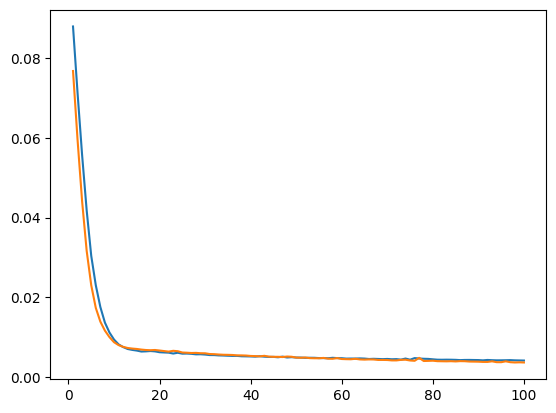

In [14]:
# !pip install -q git+https://github.com/tensorflow/docs

# import tensorflow_docs as tfdocs
# import tensorflow_docs as tfdocs
# import tensorflow_docs.plots
# import tensorflow_docs.modeling
# plotter = tfdocs.plots.HistoryPlotter(smoothing_std=2)

# plotter.plot({'RNN ': hist}, metric = "loss")
# plt.ylim([0, .03])
# plt.ylabel('MSE')

import matplotlib.pyplot as plt
import seaborn as sns


sns.lineplot(x= range(1, 101),y= hist.history['loss'])
sns.lineplot(x=range(1, 101), y=hist.history['val_loss'])
plt.show()

In [15]:
def print_error(trainY, testY, train_predict, test_predict):    
    # Error of predictions
    train_rmse = math.sqrt(mean_squared_error(trainY, train_predict))
    test_rmse = math.sqrt(mean_squared_error(testY, test_predict))
    # Print RMSE
    print('Train RMSE: %.3f RMSE' % (train_rmse))
    print('Test RMSE: %.3f RMSE' % (test_rmse))    

# make predictions
train_predict = model.predict(trainX)
test_predict = model.predict(testX)
# Mean square error
print_error(trainY, testY, train_predict, test_predict)

2/2 [==============================] - 0s 4ms/step
Train RMSE: 0.064 RMSE
Test RMSE: 0.092 RMSE


## Prediction vs Actual

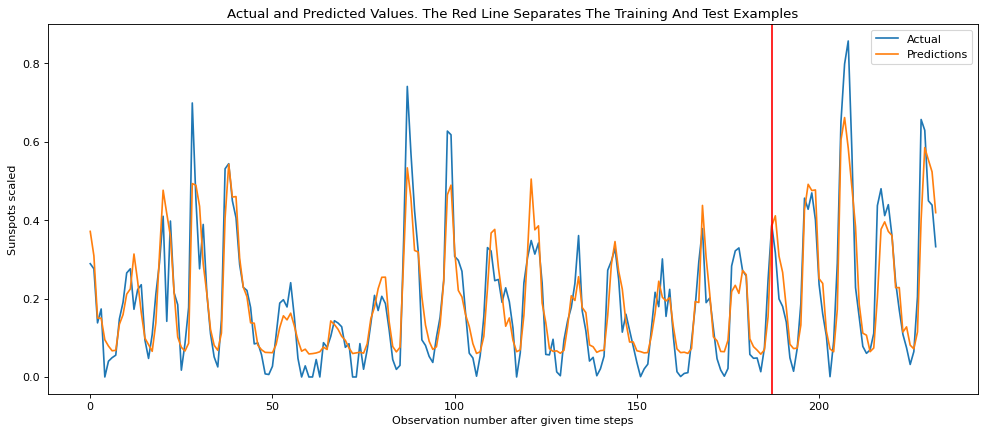

In [16]:
# Plot the result
def plot_result(trainY, testY, train_predict, test_predict):
    actual = np.append(trainY, testY)
    predictions = np.append(train_predict, test_predict)
    
    rows = len(actual)
    
    plt.figure(figsize=(15, 6), dpi=80)
    plt.plot(range(rows), actual)
    plt.plot(range(rows), predictions)
    
    plt.axvline(x=len(trainY), color='r')
    
    plt.legend(['Actual', 'Predictions'])
    plt.xlabel('Observation number after given time steps')
    plt.ylabel('Sunspots scaled')
    plt.title('Actual and Predicted Values. The Red Line Separates The Training And Test Examples')
plot_result(trainY, testY, train_predict, test_predict)

Self study : https://machinelearningmastery.com/an-introduction-to-recurrent-neural-networks-and-the-math-that-powers-them/